### Load the data

In [27]:
import pandas as pd

In [28]:
train = pd.read_csv('/kaggle/input/house-price-datasets/train.csv')
test = pd.read_csv('/kaggle/input/house-price-datasets/test.csv')


In [29]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
train.columns = train.columns.str.lower()

In [32]:
train['mszoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [33]:
train['mszoning'].dtypes

dtype('O')

In [34]:
unique = []
for col in train.columns:
    if train[col].dtypes == 'object':
        unique.append({
            col:train[col].unique(),
            'n':train[col].nunique()
        })
        


In [35]:
unique

[{'mszoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
  'n': 5},
 {'street': array(['Pave', 'Grvl'], dtype=object), 'n': 2},
 {'alley': array([nan, 'Grvl', 'Pave'], dtype=object), 'n': 2},
 {'lotshape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object), 'n': 4},
 {'landcontour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object), 'n': 4},
 {'utilities': array(['AllPub', 'NoSeWa'], dtype=object), 'n': 2},
 {'lotconfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
  'n': 5},
 {'landslope': array(['Gtl', 'Mod', 'Sev'], dtype=object), 'n': 3},
 {'neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
         'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
         'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
         'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
         'Blueste'], dtype=object),
  'n': 25},
 {'condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 

### data cleaning

In [36]:
train.isna().sum()

id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
                ... 
mosold             0
yrsold             0
saletype           0
salecondition      0
saleprice          0
Length: 81, dtype: int64

In [37]:
na_col=[]
for col in train.columns:
    if train[col].isna().sum()>0:
        na_col.append({
            col:[train[col].isna().sum(),train[col].dtypes]
        })
    

In [38]:
na_col

[{'lotfrontage': [259, dtype('float64')]},
 {'alley': [1369, dtype('O')]},
 {'masvnrtype': [872, dtype('O')]},
 {'masvnrarea': [8, dtype('float64')]},
 {'bsmtqual': [37, dtype('O')]},
 {'bsmtcond': [37, dtype('O')]},
 {'bsmtexposure': [38, dtype('O')]},
 {'bsmtfintype1': [37, dtype('O')]},
 {'bsmtfintype2': [38, dtype('O')]},
 {'electrical': [1, dtype('O')]},
 {'fireplacequ': [690, dtype('O')]},
 {'garagetype': [81, dtype('O')]},
 {'garageyrblt': [81, dtype('float64')]},
 {'garagefinish': [81, dtype('O')]},
 {'garagequal': [81, dtype('O')]},
 {'garagecond': [81, dtype('O')]},
 {'poolqc': [1453, dtype('O')]},
 {'fence': [1179, dtype('O')]},
 {'miscfeature': [1406, dtype('O')]}]

In [39]:
train.shape

(1460, 81)

In [40]:
test.shape

(1459, 80)

In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


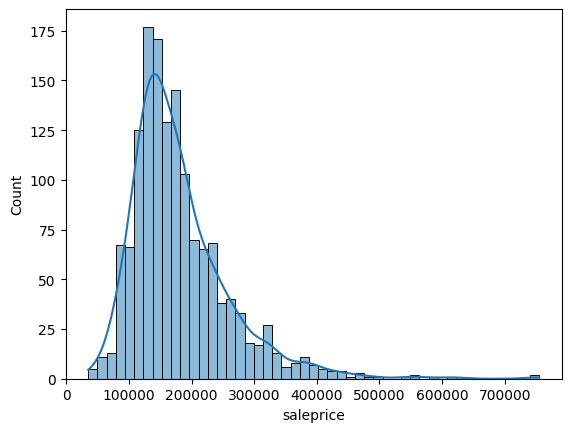

In [42]:
sns.histplot(train['saleprice'],kde=True)
plt.show()

In [43]:
test.mode().iloc[0]

Id                 1461
MSSubClass         20.0
MSZoning             RL
LotFrontage        60.0
LotArea          9600.0
                  ...  
MiscVal             0.0
MoSold              6.0
YrSold           2007.0
SaleType             WD
SaleCondition    Normal
Name: 0, Length: 80, dtype: object

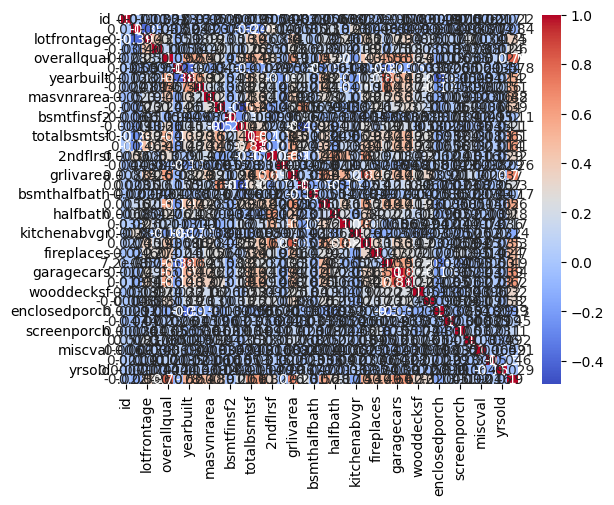

In [44]:
# Select only numeric columns for correlation
numeric_cols = train.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [45]:
numeric_cols.median()

id                  730.5
mssubclass           50.0
lotfrontage          69.0
lotarea            9478.5
overallqual           6.0
overallcond           5.0
yearbuilt          1973.0
yearremodadd       1994.0
masvnrarea            0.0
bsmtfinsf1          383.5
bsmtfinsf2            0.0
bsmtunfsf           477.5
totalbsmtsf         991.5
1stflrsf           1087.0
2ndflrsf              0.0
lowqualfinsf          0.0
grlivarea          1464.0
bsmtfullbath          0.0
bsmthalfbath          0.0
fullbath              2.0
halfbath              0.0
bedroomabvgr          3.0
kitchenabvgr          1.0
totrmsabvgrd          6.0
fireplaces            1.0
garageyrblt        1980.0
garagecars            2.0
garagearea          480.0
wooddecksf            0.0
openporchsf          25.0
enclosedporch         0.0
3ssnporch             0.0
screenporch           0.0
poolarea              0.0
miscval               0.0
mosold                6.0
yrsold             2008.0
saleprice        163000.0
dtype: float

In [46]:
numeric_cols.columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [47]:
train[numeric_cols.columns]=train[numeric_cols.columns].fillna(numeric_cols.median())

In [48]:
train[numeric_cols.columns].isna().sum()

id               0
mssubclass       0
lotfrontage      0
lotarea          0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
masvnrarea       0
bsmtfinsf1       0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
totrmsabvgrd     0
fireplaces       0
garageyrblt      0
garagecars       0
garagearea       0
wooddecksf       0
openporchsf      0
enclosedporch    0
3ssnporch        0
screenporch      0
poolarea         0
miscval          0
mosold           0
yrsold           0
saleprice        0
dtype: int64

In [49]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [50]:
test.columns = test.columns.str.lower()

In [51]:
test_num_col = test.select_dtypes(include = ['number'])

In [52]:
test_num_col.median()

id               2190.0
mssubclass         50.0
lotfrontage        67.0
lotarea          9399.0
overallqual         6.0
overallcond         5.0
yearbuilt        1973.0
yearremodadd     1992.0
masvnrarea          0.0
bsmtfinsf1        350.5
bsmtfinsf2          0.0
bsmtunfsf         460.0
totalbsmtsf       988.0
1stflrsf         1079.0
2ndflrsf            0.0
lowqualfinsf        0.0
grlivarea        1432.0
bsmtfullbath        0.0
bsmthalfbath        0.0
fullbath            2.0
halfbath            0.0
bedroomabvgr        3.0
kitchenabvgr        1.0
totrmsabvgrd        6.0
fireplaces          0.0
garageyrblt      1979.0
garagecars          2.0
garagearea        480.0
wooddecksf          0.0
openporchsf        28.0
enclosedporch       0.0
3ssnporch           0.0
screenporch         0.0
poolarea            0.0
miscval             0.0
mosold              6.0
yrsold           2008.0
dtype: float64

In [53]:
test[test_num_col.columns]=test[test_num_col.columns].fillna(test_num_col.median())

In [54]:
test[test_num_col.columns].isna().sum()

id               0
mssubclass       0
lotfrontage      0
lotarea          0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
masvnrarea       0
bsmtfinsf1       0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
totrmsabvgrd     0
fireplaces       0
garageyrblt      0
garagecars       0
garagearea       0
wooddecksf       0
openporchsf      0
enclosedporch    0
3ssnporch        0
screenporch      0
poolarea         0
miscval          0
mosold           0
yrsold           0
dtype: int64

In [55]:
train.mode().iloc[0]

id                      1
mssubclass           20.0
mszoning               RL
lotfrontage          69.0
lotarea            7200.0
                   ...   
mosold                6.0
yrsold             2009.0
saletype               WD
salecondition      Normal
saleprice        140000.0
Name: 0, Length: 81, dtype: object

In [56]:
train.fillna(train.mode().iloc[0],inplace=True)

In [57]:
test.fillna(test.mode().iloc[0],inplace=True)

In [58]:
train

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [59]:
train.dtypes

id                 int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
                  ...   
mosold             int64
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
Length: 81, dtype: object

In [60]:
train_obj = train.select_dtypes(include=['object'])

In [61]:
train_obj.columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

### EDA (Exploratory Data Analysis)


<Axes: xlabel='grlivarea', ylabel='saleprice'>

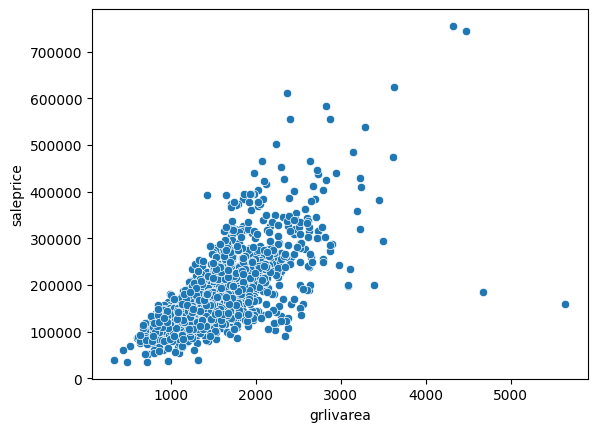

In [62]:
import seaborn as sns
sns.scatterplot(x='grlivarea', y='saleprice', data=train)


<Axes: xlabel='totalbsmtsf', ylabel='saleprice'>

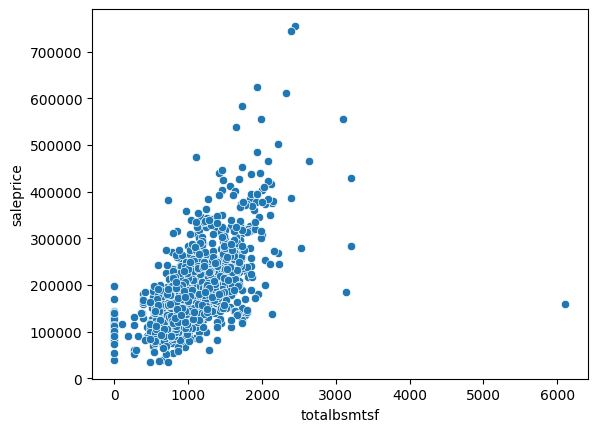

In [63]:
sns.scatterplot(x='totalbsmtsf', y='saleprice', data=train)


GarageCars, GarageArea, 1stFlrSF

<Axes: xlabel='garagearea', ylabel='saleprice'>

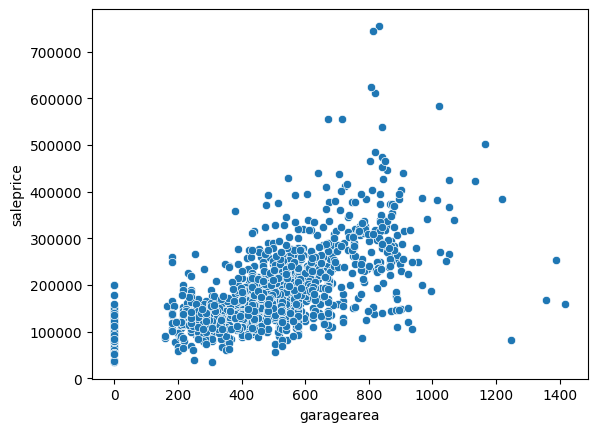

In [64]:
sns.scatterplot(x = 'garagearea',y = 'saleprice',data =train)

<Axes: xlabel='1stflrsf', ylabel='saleprice'>

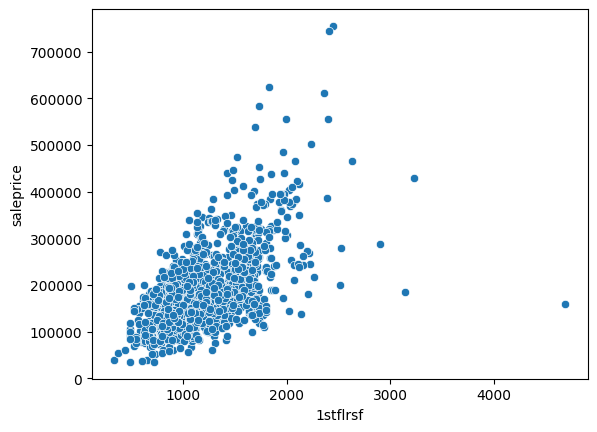

In [65]:
sns.scatterplot(x='1stflrsf',y='saleprice',data=train)

<Axes: xlabel='poolarea', ylabel='saleprice'>

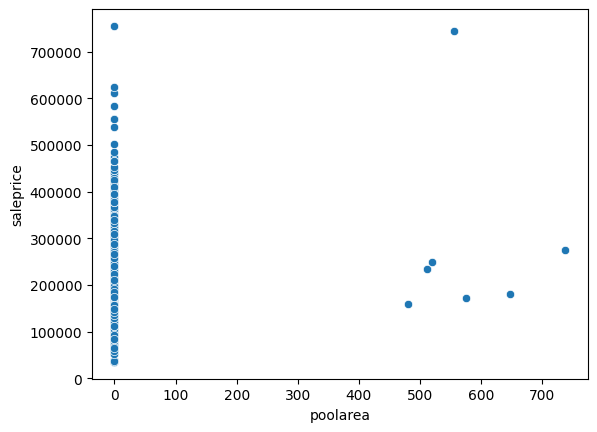

In [66]:
sns.scatterplot(x='poolarea',y = 'saleprice',data=train)

<Axes: ylabel='Frequency'>

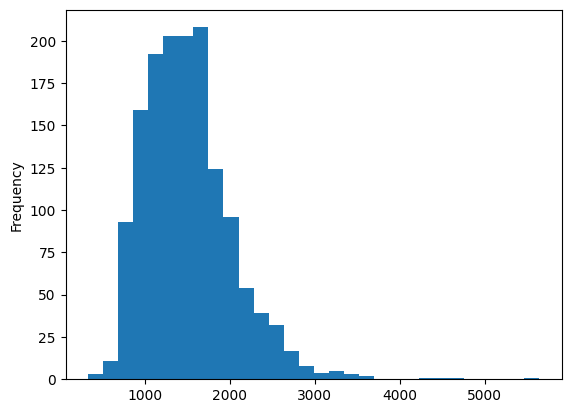

In [67]:
train['grlivarea'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

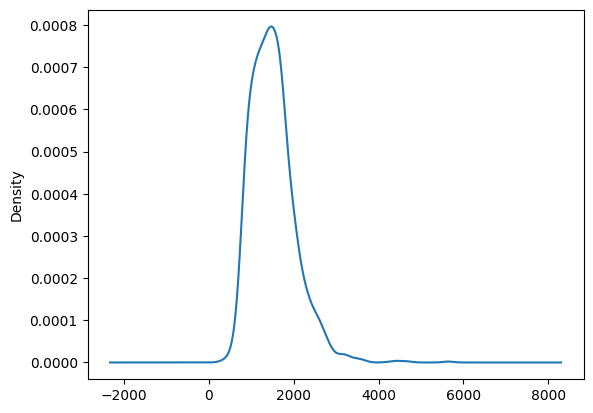

In [68]:
train['grlivarea'].plot(kind='kde')


categorical features

In [69]:
train['overallqual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: overallqual, Length: 1460, dtype: int64

<Axes: xlabel='overallqual', ylabel='saleprice'>

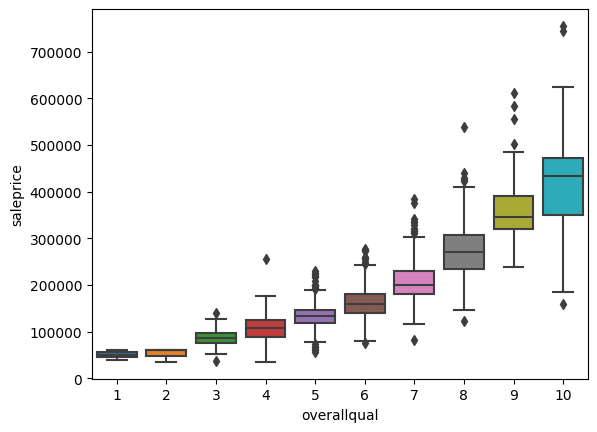

In [70]:
sns.boxplot(x='overallqual', y='saleprice', data=train)


<Axes: xlabel='neighborhood', ylabel='saleprice'>

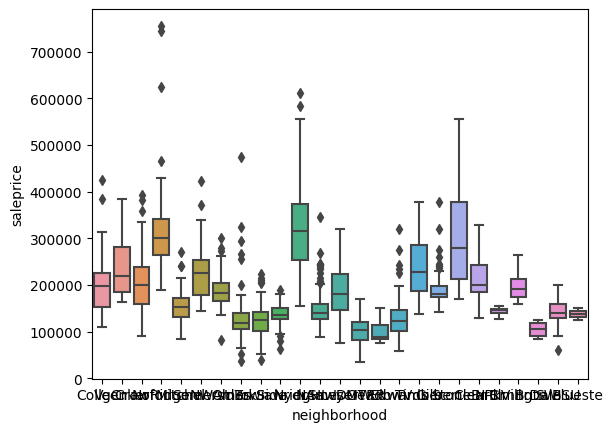

In [71]:
sns.boxplot(x='neighborhood', y='saleprice', data=train)

<Axes: xlabel='overallqual', ylabel='count'>

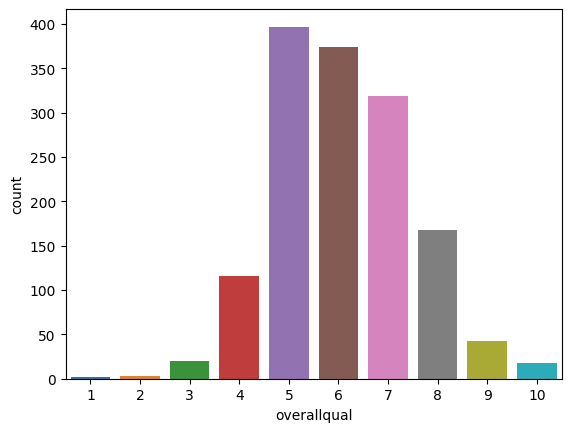

In [72]:
sns.countplot(x='overallqual', data=train)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yearbuilt', ylabel='saleprice'>

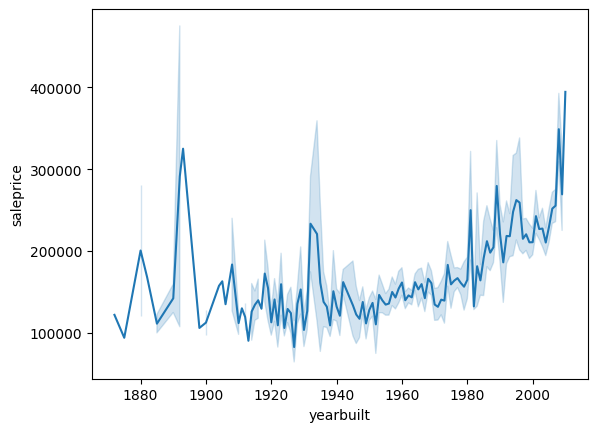

In [73]:
sns.lineplot(x='yearbuilt', y='saleprice', data=train)


<Axes: xlabel='yrsold', ylabel='saleprice'>

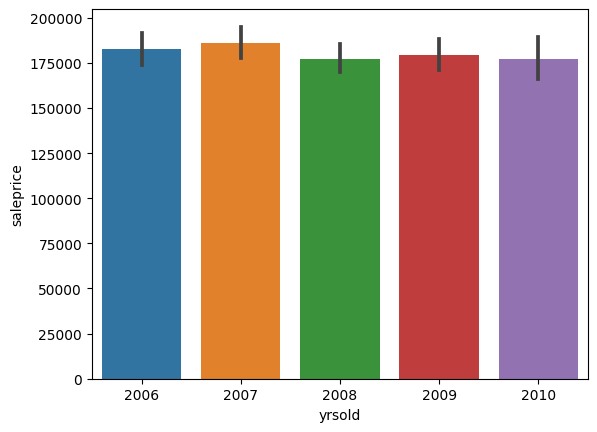

In [74]:
sns.barplot(x='yrsold', y='saleprice', data=train)


### featrure engineering

In [75]:
train['totalsf_all'] = (
    train['totalbsmtsf'] +   # Basement area
    train['1stflrsf'] +      # 1st Floor area
    train['2ndflrsf'] +      # 2nd Floor area
    train['garagearea'] +    # Garage area
    train['openporchsf'] +   # Open porch area
    train['enclosedporch'] + # Enclosed porch area
    train['3ssnporch'] +     # 3-season porch area
    train['screenporch']     # Screened porch area
)

In [76]:
train['totalsf_all']

0       3175
1       2984
2       3356
3       3422
4       4263
        ... 
1455    3100
1456    4115
1457    3804
1458    2508
1459    2856
Name: totalsf_all, Length: 1460, dtype: int64

In [77]:
train['saleprice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: saleprice, Length: 1460, dtype: int64

In [78]:
train['price_per_sf'] = train['saleprice']/train['totalsf_all']

In [79]:
train['price_per_sf']

0       65.669291
1       60.824397
2       66.597139
3       40.911748
4       58.644147
          ...    
1455    56.451613
1456    51.032807
1457    70.057834
1458    56.668660
1459    51.645658
Name: price_per_sf, Length: 1460, dtype: float64

<Axes: xlabel='price_per_sf', ylabel='saleprice'>

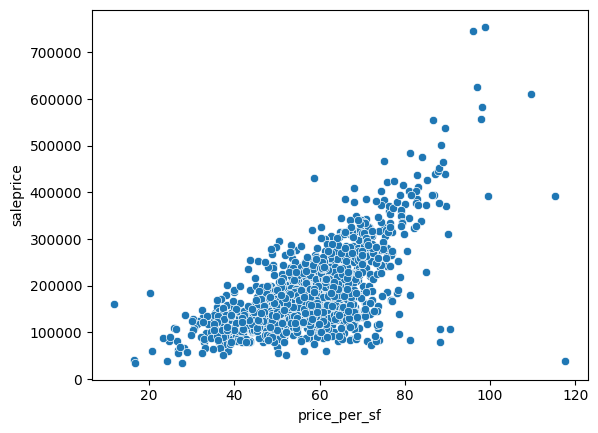

In [80]:
sns.scatterplot(x='price_per_sf',y='saleprice',data=train)

#### outlier removal 

In [81]:
std = train['price_per_sf'].std()

In [82]:
mean = train['price_per_sf'].mean()

In [83]:
# z score 
upper_lim = mean+(3*std)

In [84]:
lower_lim = mean-(3*std)

In [85]:
# outliers

train[(train['price_per_sf']>upper_lim)|(train['price_per_sf']<lower_lim)]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,totalsf_all,price_per_sf
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,MnPrv,Shed,0,7,2008,WD,Normal,40000,2442,16.380016
410,411,20,RL,68.0,9571,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,Shed,0,6,2009,COD,Abnorml,60000,2902,20.675396
495,496,30,C (all),60.0,7879,Pave,Grvl,Reg,Lvl,AllPub,...,GdWo,Shed,0,11,2009,WD,Abnorml,34900,2078,16.794995
523,524,60,RL,130.0,40094,Pave,Grvl,IR1,Bnk,AllPub,...,MnPrv,Shed,0,10,2007,New,Partial,184750,9104,20.293278
533,534,20,RL,50.0,5000,Pave,Grvl,Reg,Low,AllPub,...,MnPrv,Shed,0,1,2007,WD,Normal,39300,334,117.664671
688,689,20,RL,60.0,8089,Pave,Grvl,Reg,HLS,AllPub,...,MnPrv,Shed,0,10,2007,New,Partial,392000,3405,115.124816
691,692,60,RL,104.0,21535,Pave,Grvl,IR1,Lvl,AllPub,...,MnPrv,Shed,0,1,2007,WD,Normal,755000,7642,98.796127
803,804,60,RL,107.0,13891,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,Shed,0,1,2009,New,Partial,582933,5938,98.169923
898,899,20,RL,100.0,12919,Pave,Grvl,IR1,Lvl,AllPub,...,MnPrv,Shed,0,3,2010,New,Partial,611657,5581,109.596309
1046,1047,60,RL,85.0,16056,Pave,Grvl,IR1,Lvl,AllPub,...,MnPrv,Shed,0,7,2006,New,Partial,556581,5684,97.920654


In [86]:
train_fin = train[(train['price_per_sf']<upper_lim)&(train['price_per_sf']>lower_lim)]

In [87]:
train_fin

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,totalsf_all,price_per_sf
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,Shed,0,2,2008,WD,Normal,208500,3175,65.669291
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,Shed,0,5,2007,WD,Normal,181500,2984,60.824397
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,MnPrv,Shed,0,9,2008,WD,Normal,223500,3356,66.597139
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,3422,40.911748
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,MnPrv,Shed,0,12,2008,WD,Normal,250000,4263,58.644147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,Shed,0,8,2007,WD,Normal,175000,3100,56.451613
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,Shed,0,2,2010,WD,Normal,210000,4115,51.032807
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3804,70.057834
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,MnPrv,Shed,0,4,2010,WD,Normal,142125,2508,56.668660


#### dummies

In [88]:
train_obj = train_fin.select_dtypes(include=['object'])

In [89]:
train_dum = pd.get_dummies(data=train_fin,columns=train_obj.columns,drop_first=True)

In [90]:
train_dum

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


In [91]:
train_dum = train_dum.drop(['housestyle_2.5Fin', 'roofmatl_Roll', 'heating_OthW', 'utilities_NoSeWa', 'condition2_RRNn', 'heating_GasA', 'roofmatl_Metal', 'garagequal_Fa', 'exterior1st_Stone', 'miscfeature_TenC', 'poolqc_Fa', 'condition2_RRAe', 'condition2_RRAn', 'electrical_Mix', 'roofmatl_Membran', 'exterior1st_ImStucc', 'exterior2nd_Other'],axis=1)

In [92]:
test

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [93]:
test['totalsf_all'] = (
    test['totalbsmtsf'] +   # Basement area
    test['1stflrsf'] +      # 1st Floor area
    test['2ndflrsf'] +      # 2nd Floor area
    test['garagearea'] +    # Garage area
    test['openporchsf'] +   # Open porch area
    test['enclosedporch'] + # Enclosed porch area
    test['3ssnporch'] +     # 3-season porch area
    test['screenporch']     # Screened porch area
)

In [94]:
test_obj = test.select_dtypes(include=['object'])

In [95]:
test_dum = pd.get_dummies(columns=test_obj.columns,data = test,drop_first=True)

In [96]:
test_dum

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,False,True,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,False,True,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,False,True,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,False,True,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,False,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,False,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,False,True,False,False,False,True,False


In [97]:
missing_in_test = set(train.columns) - set(test.columns)
missing_in_train = set(test.columns) - set(train.columns)
print(f"Features missing in test: {missing_in_test}")
print(f"Features missing in train: {missing_in_train}")

Features missing in test: {'price_per_sf', 'saleprice'}
Features missing in train: set()


In [98]:
train_dum

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


#### scale the features before training 

In [99]:
X = train_dum.drop(['saleprice','price_per_sf'],axis=1)

In [100]:
y = train_dum['saleprice']

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
x_scaled = scaler.fit_transform(X)

In [104]:
x_scaled

array([[-1.72731937,  0.07191953, -0.21676732, ..., -0.11842823,
         0.45940753, -0.29808627],
       [-1.72494991, -0.87135162,  0.5019247 , ..., -0.11842823,
         0.45940753, -0.29808627],
       [-1.72258045,  0.07191953, -0.07302892, ..., -0.11842823,
         0.45940753, -0.29808627],
       ...,
       [ 1.72498596,  0.30773732, -0.16885452, ..., -0.11842823,
         0.45940753, -0.29808627],
       [ 1.72735542, -0.87135162, -0.07302892, ..., -0.11842823,
         0.45940753, -0.29808627],
       [ 1.72972488, -0.87135162,  0.26236069, ..., -0.11842823,
         0.45940753, -0.29808627]])

In [105]:
from sklearn.model_selection import train_test_split

scale the test data

In [106]:
x_test_scaled = scaler.transform(test_dum)

In [107]:
missing_in_test = set(train_dum.columns) - set(test_dum.columns)
# missing_in_train = set(test.columns) - set(train.columns)
print(f"Features missing in test: {missing_in_test}")
print(f"Features missing in train: {missing_in_train}")

Features missing in test: {'price_per_sf', 'saleprice'}
Features missing in train: set()


PRINCIPAL COMPONENT ANALYSIS

In [108]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components=0.95)

In [110]:
x_train_pca = pca.fit_transform(x_scaled)

In [111]:
test_pca = pca.transform(x_test_scaled)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x_train_pca, y, test_size=0.25, random_state=42)

In [113]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1084, 362, 1084, 362)

model building

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lr = LinearRegression()

In [116]:
lr.fit(X_train,y_train)

LinearRegression()

In [117]:
y_pred = lr.predict(X_test)

In [118]:
from sklearn.metrics import mean_squared_error


In [119]:
rmse = mean_squared_error(y_test,y_pred,squared=False)

In [120]:
rmse
print(f"Linear Regression RMSE: {rmse}")


Linear Regression RMSE: 37349.433650081446


randomforest

In [121]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 30233.85908007836


XGB 

In [122]:
!pip install xgboost


In [123]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 30246.97633691678


In [124]:
final_predictions = (0.5 * y_pred_rf + 0.5 * y_pred_xgb)
rmse_ensemble = mean_squared_error(y_test, final_predictions, squared=False)
print(f"Ensemble RMSE: {rmse_ensemble}")


Ensemble RMSE: 29797.7079068819


In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Hyperparameter grid for regression models
grid = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1, 10],
            'max_iter': [5000, 10000, 20000]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'criterion': ['squared_error', 'absolute_error']
        }
    },
    'xgboost': {
        'model': xgb.XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

# Display grid for verification
print(grid)


{'linear_regression': {'model': LinearRegression(), 'params': {'fit_intercept': [True, False], 'positive': [True, False]}}, 'lasso': {'model': Lasso(), 'params': {'alpha': [0.1, 1, 10], 'max_iter': [5000, 10000, 20000]}}, 'random_forest': {'model': RandomForestRegressor(random_state=42), 'params': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'criterion': ['squared_error', 'absolute_error']}}, 'xgboost': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, m

In [127]:
grid.items()

dict_items([('linear_regression', {'model': LinearRegression(), 'params': {'fit_intercept': [True, False], 'positive': [True, False]}}), ('lasso', {'model': Lasso(), 'params': {'alpha': [0.1, 1, 10], 'max_iter': [5000, 10000, 20000]}}), ('random_forest', {'model': RandomForestRegressor(random_state=42), 'params': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'criterion': ['squared_error', 'absolute_error']}}), ('xgboost', {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None,

In [128]:
best_models = {}

for model , config in grid.items():
    model = config['model']
    params = config['params']

    randcv = RandomizedSearchCV(
        estimator=model, 
        param_distributions=params, 
        scoring='neg_root_mean_squared_error', 
        cv=3, 
        n_iter=min(4, len(params)), 
        n_jobs=-1  # Parallelize
    )
    randcv.fit(X_train,y_train)
    
    best_models[model] = {
        'best_model': randcv.best_estimator_,
        'best_params': randcv.best_params_,
        'best_score': -randcv.best_score_
    }


In [129]:
best_models

{LinearRegression(): {'best_model': LinearRegression(),
  'best_params': {'positive': False, 'fit_intercept': True},
  'best_score': 67222.02265750078},
 Lasso(): {'best_model': Lasso(alpha=1, max_iter=10000),
  'best_params': {'max_iter': 10000, 'alpha': 1},
  'best_score': 63453.25832822429},
 RandomForestRegressor(random_state=42): {'best_model': RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42),
  'best_params': {'n_estimators': 300,
   'min_samples_split': 2,
   'max_depth': 10,
   'criterion': 'squared_error'},
  'best_score': 28901.445287291786},
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=Non

XGB is the best performer

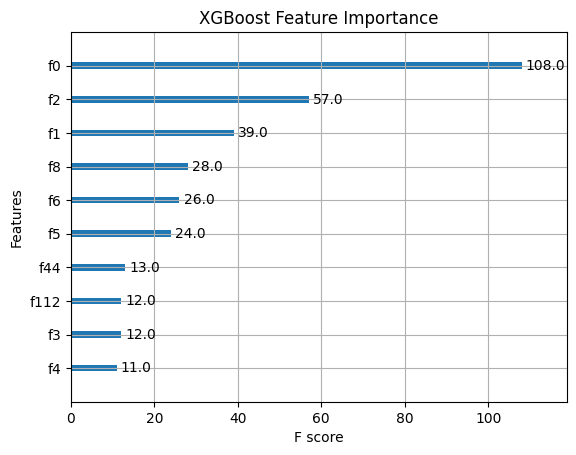

In [130]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Extract feature importance
xgb_model = xgb.XGBRegressor(subsample=0.8, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, random_state=42)
xgb_model.fit(X_train, y_train)

xgb.plot_importance(xgb_model, max_num_features=10)  # Top 10 features
plt.title("XGBoost Feature Importance")
plt.show()


In [131]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
from sklearn.model_selection import cross_val_score

estimators = [
    ('rf', RandomForestRegressor(max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(max_depth=3, learning_rate=0.1, random_state=42))
]

stack_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack_model.fit(X_train, y_train)

stack_rmse = np.sqrt(-cross_val_score(stack_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
print(f'Stacking RMSE: {stack_rmse}')


Stacking RMSE: 26294.285355893382


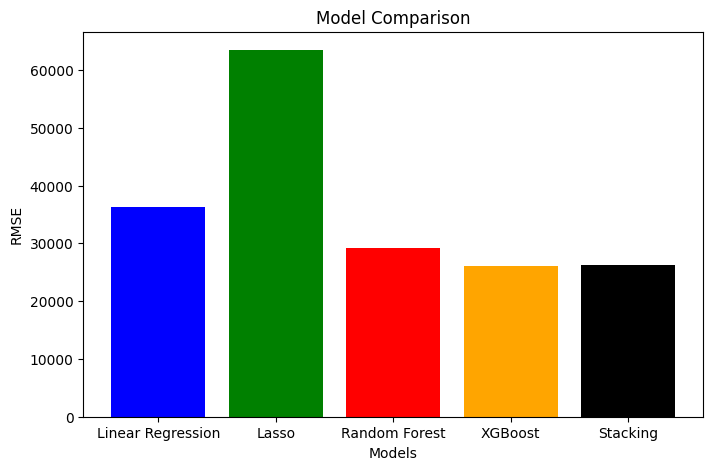

In [132]:
model_names = ['Linear Regression', 'Lasso', 'Random Forest', 'XGBoost','Stacking']
rmse_scores = [36246, 63453, 29145, 26040,26294]

plt.figure(figsize=(8, 5))
plt.bar(model_names, rmse_scores, color=['blue', 'green', 'red', 'orange','black'])
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Model Comparison")
plt.show()


Now that XGBoost seems to be performing best, ensure it generalizes well by evaluating it on the test set


In [133]:
y_pred = xgb_model.predict(X_test)

In [134]:
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'rmse of test data : {rmse_test}')

rmse of test data : 28053.62400710621


since rmse of test is more than train ...this indicates a slight overfitting of the model over train data set 
...so lets consider early stopping the xgb model while training ,,,so that it wont get into overfitting 

##### predictions on test datset


In [135]:
test_pca.shape

(1459, 152)

In [136]:
X_test.shape

(362, 152)

In [137]:
final_pred = xgb_model.predict(test_pca)

In [138]:
final_pred

array([131808.31, 159869.28, 199798.48, ..., 172683.06, 117182.6 ,
       242212.17], dtype=float32)

In [139]:
submission = pd.DataFrame({
    'Id':test.id,
    'SalePrice':final_pred
})

In [140]:
submission

,Id,SalePrice
0,1461,131808.312500
1,1462,159869.281250
2,1463,199798.484375
3,1464,202728.656250
4,1465,192061.078125
...,...,...
1454,2915,87263.929688
1455,2916,97721.898438
1456,2917,172683.062500
1457,2918,117182.601562


In [141]:
submission.to_csv('submission.csv',index = False)
print('submission file created successfully ')

submission file created successfully 
